In [1]:
# coding: utf-8

# **Decision Trees - Regression**

# Source Credit : “Hands-on Machine Learning with Scikit-Learn and TensorFlow ” by Aurelien Geron

# # Setup

# First, let's make sure this notebook works well in both python 2 and 3, import a few common modules,
# ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

In [3]:
# To plot pretty figures
#get_ipython().magic('matplotlib inline')
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

In [4]:
def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300) 

In [5]:
# # Training and visualizing


from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [6]:
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

In [7]:
tree_clf = DecisionTreeClassifier(max_depth=20, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=20, random_state=42)

In [8]:
from sklearn.tree import export_graphviz

# produce decision tree graph
dot_data = export_graphviz(
        tree_clf,
# commented by CellStrat
#       out_file=image_path("iris_tree.dot"),
        out_file=None,
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

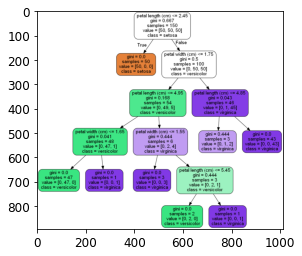

In [9]:
# added by CellStrat
# save decision tree graph to disk
from pydotplus import graph_from_dot_data
graph = graph_from_dot_data(dot_data)
#graph.write_png('tree.png', PROJECT_ROOT_DIR+"/images/decision_trees/")
graph.write_png(PROJECT_ROOT_DIR+"/images/" + CHAPTER_ID + "/tree.png")
# tree.png file is saved in the code directory
import matplotlib.image as mpimg
#plt.imshow(mpimg.imread('tree.png'))
#plt.imshow(mpimg.imread(PROJECT_ROOT_DIR+"/images/" + CHAPTER_ID + "/tree.png"))
plt.show(plt.imshow(mpimg.imread(PROJECT_ROOT_DIR+"/images/" + CHAPTER_ID + "/tree.png")))

In [10]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap, linewidth=10)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The following kwargs were not used by contour: 'linewidth'
  # Remove the CWD from sys.path while we load stuff.


Saving figure decision_tree_decision_boundaries_plot


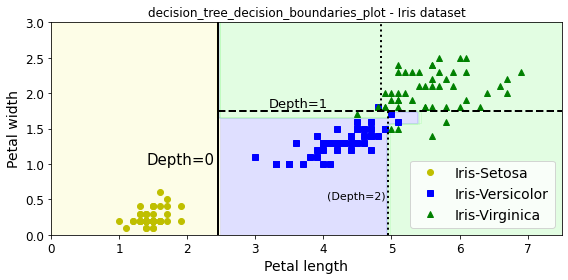

In [11]:
plt.figure(figsize=(8, 4))
# CellStrat : added legend=True variable)
plot_decision_boundary(tree_clf, X, y, legend=True)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.title("decision_tree_decision_boundaries_plot - Iris dataset")

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

In [12]:
# # Predicting classes and class probabilities

print("class probabilities for petal_len 3 cm and petal_width 1 cm :-")
print (tree_clf.predict_proba([[3, 1]]))

class probabilities for petal_len 3 cm and petal_width 1 cm :-
[[0. 1. 0.]]


In [13]:
print("class name :- (0=Setosa, 1=Versicolor, 2=Virginica)")
print (tree_clf.predict([[3, 1]]))

class name :- (0=Setosa, 1=Versicolor, 2=Virginica)
[1]


In [14]:
# # Regression trees

# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [15]:
print("X : ", X)

X :  [[0.37454012]
 [0.95071431]
 [0.73199394]
 [0.59865848]
 [0.15601864]
 [0.15599452]
 [0.05808361]
 [0.86617615]
 [0.60111501]
 [0.70807258]
 [0.02058449]
 [0.96990985]
 [0.83244264]
 [0.21233911]
 [0.18182497]
 [0.18340451]
 [0.30424224]
 [0.52475643]
 [0.43194502]
 [0.29122914]
 [0.61185289]
 [0.13949386]
 [0.29214465]
 [0.36636184]
 [0.45606998]
 [0.78517596]
 [0.19967378]
 [0.51423444]
 [0.59241457]
 [0.04645041]
 [0.60754485]
 [0.17052412]
 [0.06505159]
 [0.94888554]
 [0.96563203]
 [0.80839735]
 [0.30461377]
 [0.09767211]
 [0.68423303]
 [0.44015249]
 [0.12203823]
 [0.49517691]
 [0.03438852]
 [0.9093204 ]
 [0.25877998]
 [0.66252228]
 [0.31171108]
 [0.52006802]
 [0.54671028]
 [0.18485446]
 [0.96958463]
 [0.77513282]
 [0.93949894]
 [0.89482735]
 [0.59789998]
 [0.92187424]
 [0.0884925 ]
 [0.19598286]
 [0.04522729]
 [0.32533033]
 [0.38867729]
 [0.27134903]
 [0.82873751]
 [0.35675333]
 [0.28093451]
 [0.54269608]
 [0.14092422]
 [0.80219698]
 [0.07455064]
 [0.98688694]
 [0.77224477]
 

In [16]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [17]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [18]:
# show the decision tree with depth 2
dot_data = export_graphviz(
        tree_reg1,
# commented by CellStrat
#       out_file=image_path("regression_tree.dot"),
        out_file=None,
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

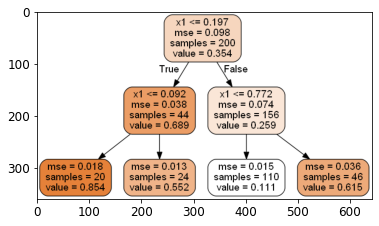

In [19]:
# added by CellStrat
# save regression tree graph to disk
from pydotplus import graph_from_dot_data
graph = graph_from_dot_data(dot_data)
#graph.write_png('regression tree with depth 2 - noisy quadratic dataset.png')
graph.write_png(PROJECT_ROOT_DIR+"/images/" + CHAPTER_ID + "/depth 2 noisy quadratic dataset.png")
# regression_tree.png file is saved in the code directory
import matplotlib.image as mpimg
#plt.imshow(mpimg.imread('regression tree with depth 2 - noisy quadratic dataset.png'))
#plt.imshow(mpimg.imread(PROJECT_ROOT_DIR+"/images/" + CHAPTER_ID + "/depth 2 noisy quadratic dataset.png"))
plt.show(plt.imshow(mpimg.imread(PROJECT_ROOT_DIR+"/images/" + CHAPTER_ID + "/depth 2 noisy quadratic dataset.png")))

In [20]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    print("x1 : ", x1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

x1 :  [[0.        ]
 [0.00200401]
 [0.00400802]
 [0.00601202]
 [0.00801603]
 [0.01002004]
 [0.01202405]
 [0.01402806]
 [0.01603206]
 [0.01803607]
 [0.02004008]
 [0.02204409]
 [0.0240481 ]
 [0.0260521 ]
 [0.02805611]
 [0.03006012]
 [0.03206413]
 [0.03406814]
 [0.03607214]
 [0.03807615]
 [0.04008016]
 [0.04208417]
 [0.04408818]
 [0.04609218]
 [0.04809619]
 [0.0501002 ]
 [0.05210421]
 [0.05410822]
 [0.05611222]
 [0.05811623]
 [0.06012024]
 [0.06212425]
 [0.06412826]
 [0.06613226]
 [0.06813627]
 [0.07014028]
 [0.07214429]
 [0.0741483 ]
 [0.0761523 ]
 [0.07815631]
 [0.08016032]
 [0.08216433]
 [0.08416834]
 [0.08617234]
 [0.08817635]
 [0.09018036]
 [0.09218437]
 [0.09418838]
 [0.09619238]
 [0.09819639]
 [0.1002004 ]
 [0.10220441]
 [0.10420842]
 [0.10621242]
 [0.10821643]
 [0.11022044]
 [0.11222445]
 [0.11422846]
 [0.11623246]
 [0.11823647]
 [0.12024048]
 [0.12224449]
 [0.1242485 ]
 [0.12625251]
 [0.12825651]
 [0.13026052]
 [0.13226453]
 [0.13426854]
 [0.13627255]
 [0.13827655]
 [0.14028056]


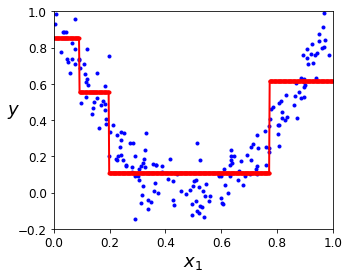

In [21]:
plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)

No handles with labels found to put in legend.


x1 :  [[0.        ]
 [0.00200401]
 [0.00400802]
 [0.00601202]
 [0.00801603]
 [0.01002004]
 [0.01202405]
 [0.01402806]
 [0.01603206]
 [0.01803607]
 [0.02004008]
 [0.02204409]
 [0.0240481 ]
 [0.0260521 ]
 [0.02805611]
 [0.03006012]
 [0.03206413]
 [0.03406814]
 [0.03607214]
 [0.03807615]
 [0.04008016]
 [0.04208417]
 [0.04408818]
 [0.04609218]
 [0.04809619]
 [0.0501002 ]
 [0.05210421]
 [0.05410822]
 [0.05611222]
 [0.05811623]
 [0.06012024]
 [0.06212425]
 [0.06412826]
 [0.06613226]
 [0.06813627]
 [0.07014028]
 [0.07214429]
 [0.0741483 ]
 [0.0761523 ]
 [0.07815631]
 [0.08016032]
 [0.08216433]
 [0.08416834]
 [0.08617234]
 [0.08817635]
 [0.09018036]
 [0.09218437]
 [0.09418838]
 [0.09619238]
 [0.09819639]
 [0.1002004 ]
 [0.10220441]
 [0.10420842]
 [0.10621242]
 [0.10821643]
 [0.11022044]
 [0.11222445]
 [0.11422846]
 [0.11623246]
 [0.11823647]
 [0.12024048]
 [0.12224449]
 [0.1242485 ]
 [0.12625251]
 [0.12825651]
 [0.13026052]
 [0.13226453]
 [0.13426854]
 [0.13627255]
 [0.13827655]
 [0.14028056]


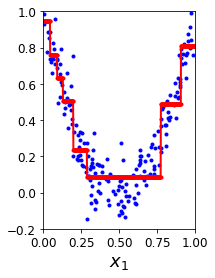

In [22]:
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("DT regression : max_depth=2 (noisy quadratic dataset)", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)

Saving figure tree_regression_plot


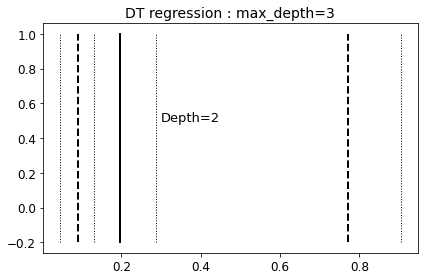

In [23]:
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("DT regression : max_depth=3", fontsize=14)

save_fig("tree_regression_plot")
plt.show()

In [24]:
# regularize Decision Tree regression by capping min-sample-leaf value to prevent overfitting

tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
#tree_reg2 = DecisionTreeRegressor(random_state=42, max_leaf_nodes=6)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

DecisionTreeRegressor(min_samples_leaf=10, random_state=42)

In [25]:
x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

Saving figure tree_regression_regularization_plot


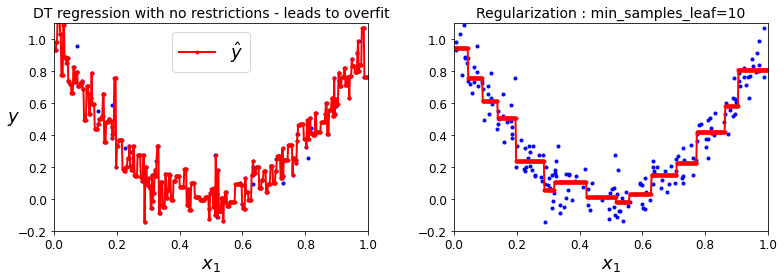

In [26]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("DT regression with no restrictions - leads to overfit", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("Regularization : min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)
#plt.title("Regularization : max_leaf_nodes={}".format(tree_reg2.max_leaf_nodes), fontsize=14)

save_fig("tree_regression_regularization_plot")
plt.show()